<a href="https://colab.research.google.com/github/pallavi0327/Student-Performance-Analysis-System/blob/main/PRACTICAL_NO_3_4_SMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


In [2]:
import numpy as np


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv('Online Sales Data.csv')

In [8]:
df.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


In [9]:
print(df.isnull().sum())

Transaction ID      0
Date                0
Product Category    0
Product Name        0
Units Sold          0
Unit Price          0
Total Revenue       0
Region              0
Payment Method      0
dtype: int64


In [10]:
df=df.dropna()

In [13]:
# The previous df.dropna() removed all nulls, so this fillna operation is redundant.
# However, the TypeError occurred because it tried to calculate the mean of non-numeric columns like 'Date'.
# To prevent the error and ensure robustness, we will only attempt to fill numeric columns with their mean
# and only if they actually have null values.

numeric_cols = df.select_dtypes(include=['number']).columns
for col in numeric_cols:
  if df[col].isnull().any():
    df[col] = df[col].fillna(df[col].mean())

In [14]:
column_name='Total Revenue'
Q1=df[column_name].quantile(0.25)
Q3=df[column_name].quantile(0.75)
IQR=Q3-Q1
outliers=df[((df[column_name]<Q1-1.5*IQR)) |(df[column_name]>(Q3+1.5*IQR))]
print (outliers)

     Transaction ID        Date Product Category  \
0             10001  2024-01-01      Electronics   
6             10007  2024-01-07      Electronics   
7             10008  2024-01-08  Home Appliances   
12            10013  2024-01-13      Electronics   
18            10019  2024-01-19      Electronics   
35            10036  2024-02-05           Sports   
36            10037  2024-02-06      Electronics   
37            10038  2024-02-07  Home Appliances   
42            10043  2024-02-12      Electronics   
66            10067  2024-03-07      Electronics   
72            10073  2024-03-13      Electronics   
85            10086  2024-03-26  Home Appliances   
95            10096  2024-04-05           Sports   
102           10103  2024-04-12      Electronics   
120           10121  2024-04-30      Electronics   
132           10133  2024-05-12      Electronics   
138           10139  2024-05-18      Electronics   
162           10163  2024-06-11      Electronics   
216         

In [17]:
median=df['Unit Price'].median()
df['Unit Price']=np.where(((df['Unit Price']<(Q1-1.5*IQR))) | (df['Unit Price']>(Q3+1.5*IQR)),median,df['Unit Price'])

In [18]:
df.to_csv('/cleaned Online Sales Data.csv ',index=False)

In [20]:
import matplotlib.pyplot as plt
import os
output_dir='/kaggle/working'
os.makedirs(output_dir,exist_ok=True)
plt.savefig(os.path.join(output_dir,'sales_distribution_pie_chart.png'))
plt.show()

<Figure size 640x480 with 0 Axes>

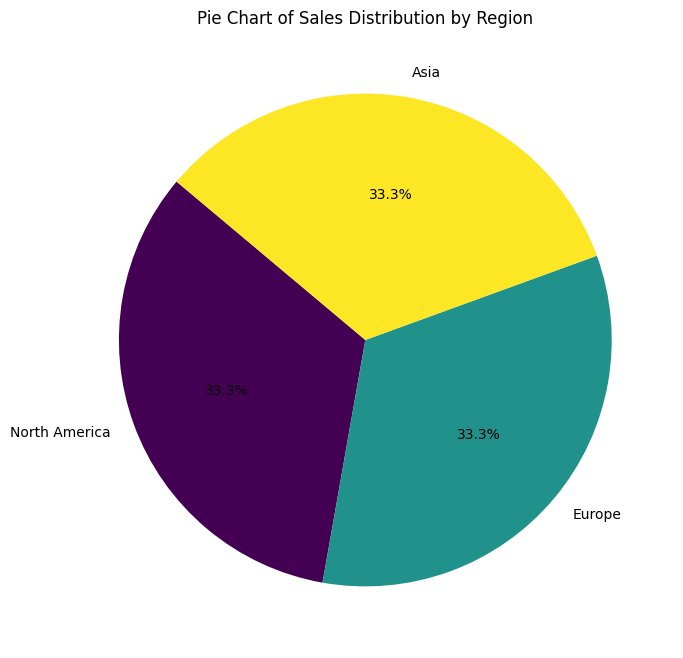

In [22]:
import matplotlib.pyplot as plt
region_count=df['Region'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(region_count,labels=region_count.index,autopct='%1.1f%%',startangle=140,colors=plt.cm.viridis(np.linspace(0,1,len(region_count))))
plt.title('Pie Chart of Sales Distribution by Region')
plt.show()

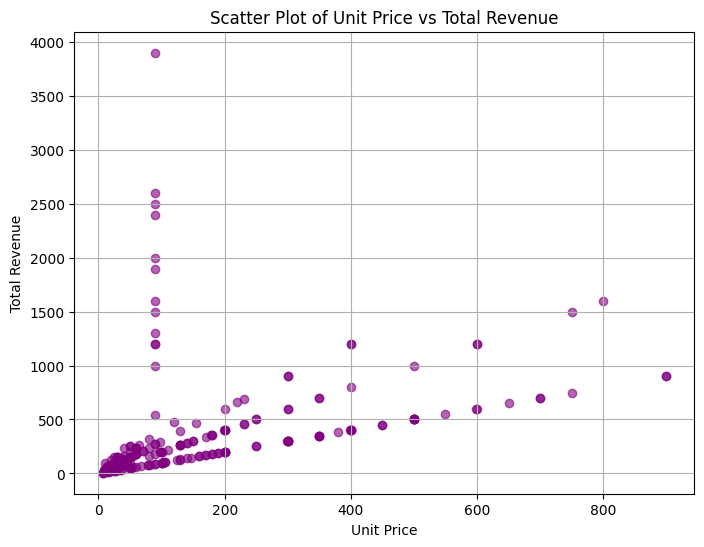

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(df['Unit Price'], df['Total Revenue'],color='Purple',alpha=0.6)
plt.title('Scatter Plot of Unit Price vs Total Revenue')
plt.xlabel('Unit Price')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

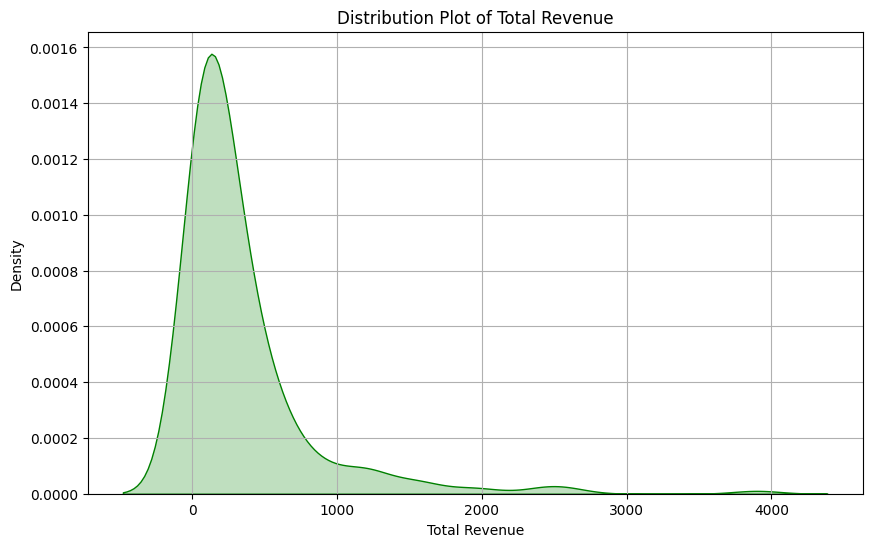

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.kdeplot(df['Total Revenue'], fill=True, color='Green')
plt.title('Distribution Plot of Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Density')
plt.grid(True)
plt.show()

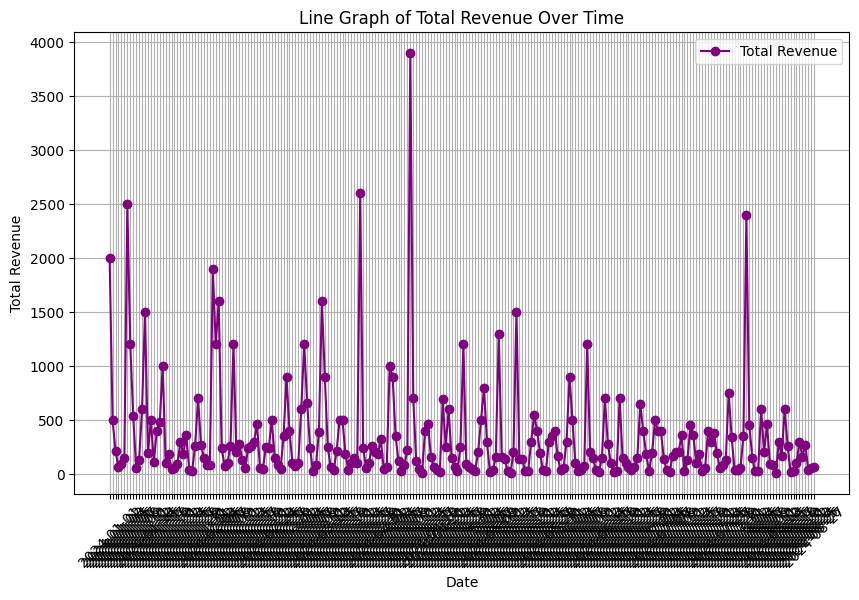

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(10,6))
plt.plot(df['Date'], df['Total Revenue'], marker = 'o', linestyle = '-', color = '', label='Total Revenue')
plt.title('Line Graph of Total Revenue Over Time')
plt.xlabel('Date')

plt.ylabel('Total Revenue')
plt.xticks(rotation = 45)
plt.legend()
plt.grid(True)
plt.show()

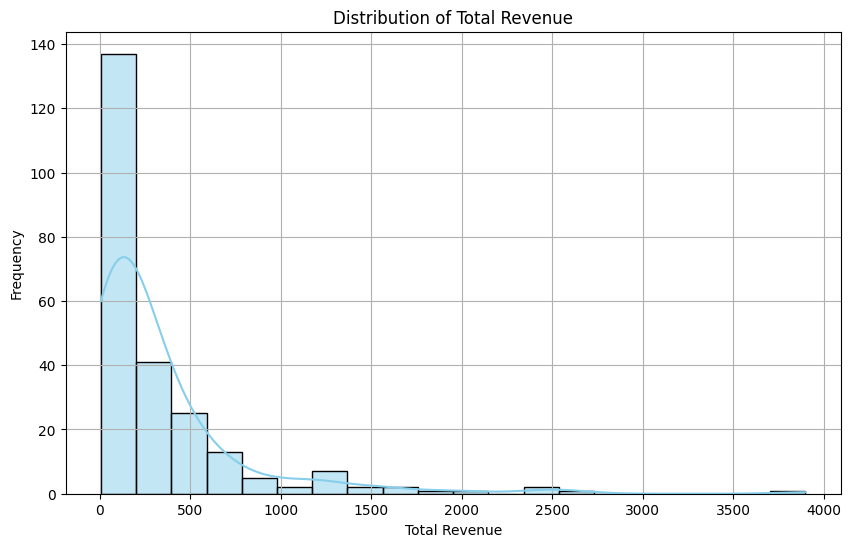

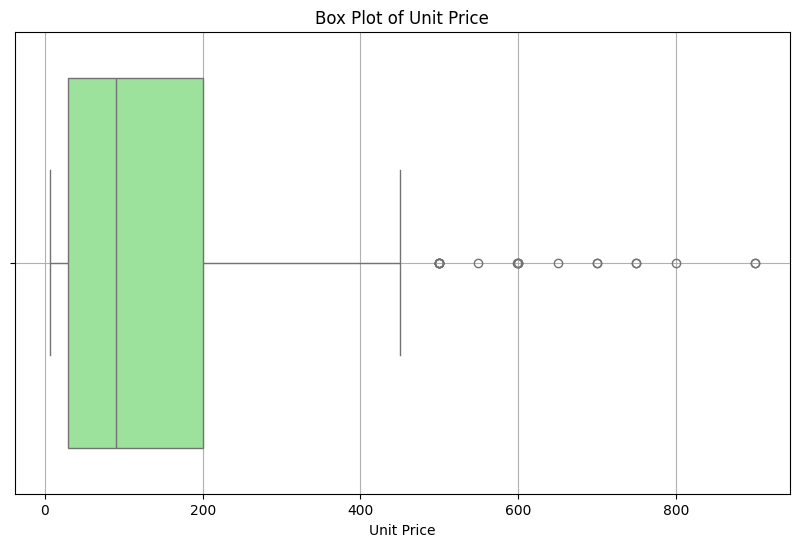

In [31]:
plt.figure(figsize=(10,6))
sns.histplot(df['Total Revenue'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x=df["Unit Price"], color= 'lightgreen')
plt.title('Box Plot of Unit Price')
plt.xlabel('Unit Price')
plt.grid(True)
plt.show()